In [1]:
import requests
import pandas as pd

API_KEY = "c2811c7af9ed4ff9b20a7a3f672454f0"
url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={API_KEY}"

response = requests.get(url)
data = response.json()

articles = data['articles']
titles = [article["title"] for article in articles]
descriptions = [article["description"] for article in articles]

df = pd.DataFrame({
    'Title': titles,
    'Description': descriptions
})

print(df.head())

                                               Title  \
0  57+ Apple Black Friday deals LIVE: iPhone, Air...   
1  Guinea-Bissau’s ousted President Umaro Sissoco...   
2  Here's what to know about the federal ban thre...   
3  OpenAI partners amass $100bn debt pile to fund...   
4  Bengals beat Ravens in Joe Burrow’s return, 32...   

                                         Description  
0                The very best Apple deals right now  
1  Sissoco Embaló has arrived in Senegal "safe an...  
2  THC-infused drinks and snacks have soared in p...  
3  Cloud companies and developers rely on lossmak...  
4  Burrow threw for 261 yards with a pair of touc...  


In [2]:
print(df.isnull().sum())

description_count = df['Description'].notna().sum()

print(f"Number of articles with descriptions: {description_count}")

Title          0
Description    1
dtype: int64
Number of articles with descriptions: 15


In [4]:
! pip install textblob

from textblob import TextBlob

df['Sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

print(df[['Title', 'Sentiment']].head())


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


                                               Title  Sentiment
0  57+ Apple Black Friday deals LIVE: iPhone, Air...   0.156566
1  Guinea-Bissau’s ousted President Umaro Sissoco...   0.000000
2  Here's what to know about the federal ban thre...   0.000000
3  OpenAI partners amass $100bn debt pile to fund...   0.000000
4  Bengals beat Ravens in Joe Burrow’s return, 32...   0.000000


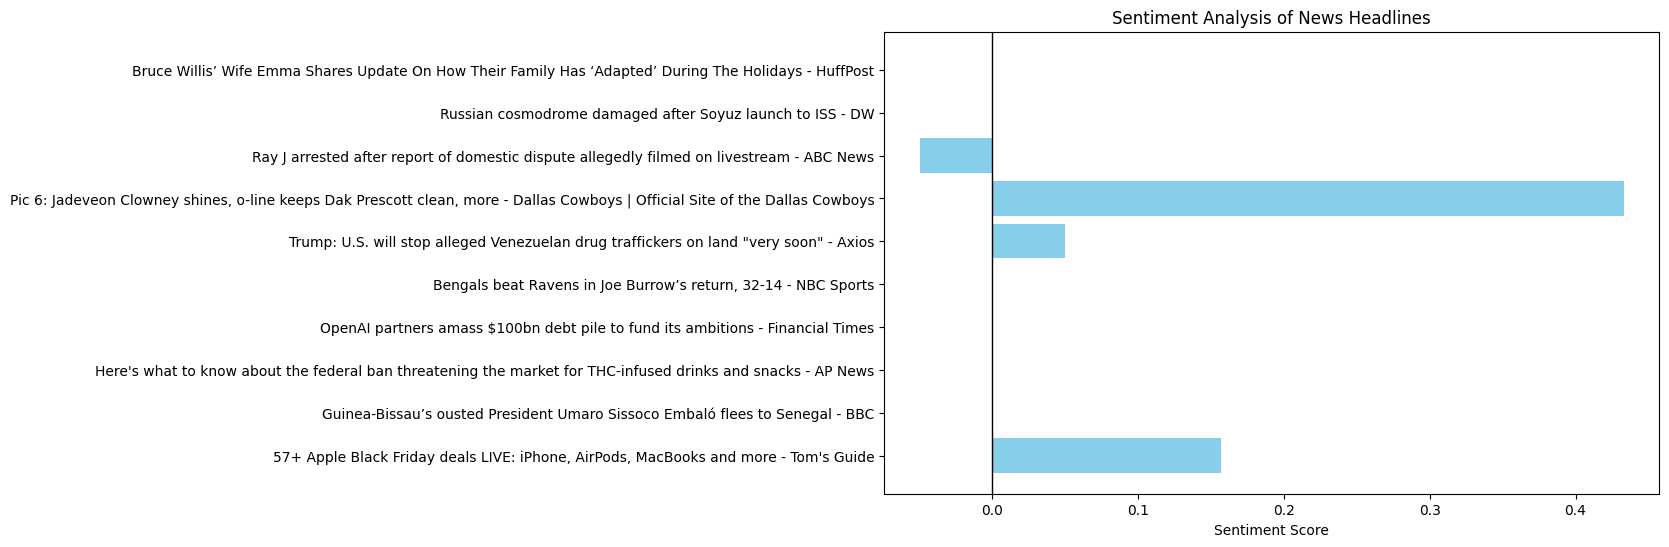

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.barh(df['Title'][:10], df['Sentiment'][:10], color = 'skyblue')
plt.xlabel("Sentiment Score")
plt.title("Sentiment Analysis of News Headlines")
plt.axvline(0, color='black', linewidth = 1)
plt.show()